Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Load and Explore the Dataset

In [2]:
df = pd.read_csv('kaggle_diabetes.csv')

print("First 5 rows of the dataset:")
print(df.head(), "\n")

print("Dataset information:")
print(df.info(), "\n")

print("Descriptive statistics:")
print(df.describe(), "\n")

First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      138             62             35        0  33.6   
1            0       84             82             31      125  38.2   
2            0      145              0              0        0  44.2   
3            0      135             68             42      250  42.3   
4            1      139             62             41      480  40.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.127   47        1  
1                     0.233   23        0  
2                     0.630   31        1  
3                     0.365   24        1  
4                     0.536   21        0   

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000

Data Cleaning and Imputation

In [4]:
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns_to_impute:
    df[col] = df[col].replace(0, df[col].median())

print("Descriptive statistics after imputing 0 values with the median:")
print(df.describe(), "\n")

Descriptive statistics after imputing 0 values with the median:
       Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  2000.000000  2000.000000    2000.000000     2000.00000  2000.000000   
mean      3.703500   121.943000      72.385500       27.52450    99.374000   
std       3.306063    30.535733      11.949824        9.56374    98.438245   
min       0.000000    44.000000      24.000000        7.00000    14.000000   
25%       1.000000    99.000000      64.000000       23.00000    40.000000   
50%       3.000000   117.000000      72.000000       23.00000    40.000000   
75%       6.000000   141.000000      80.000000       32.00000   130.000000   
max      17.000000   199.000000     122.000000      110.00000   744.000000   

               BMI  DiabetesPedigreeFunction          Age      Outcome  
count  2000.000000               2000.000000  2000.000000  2000.000000  
mean     32.645200                  0.470930    33.090500     0.342000  
std       7.19

Data Visualization

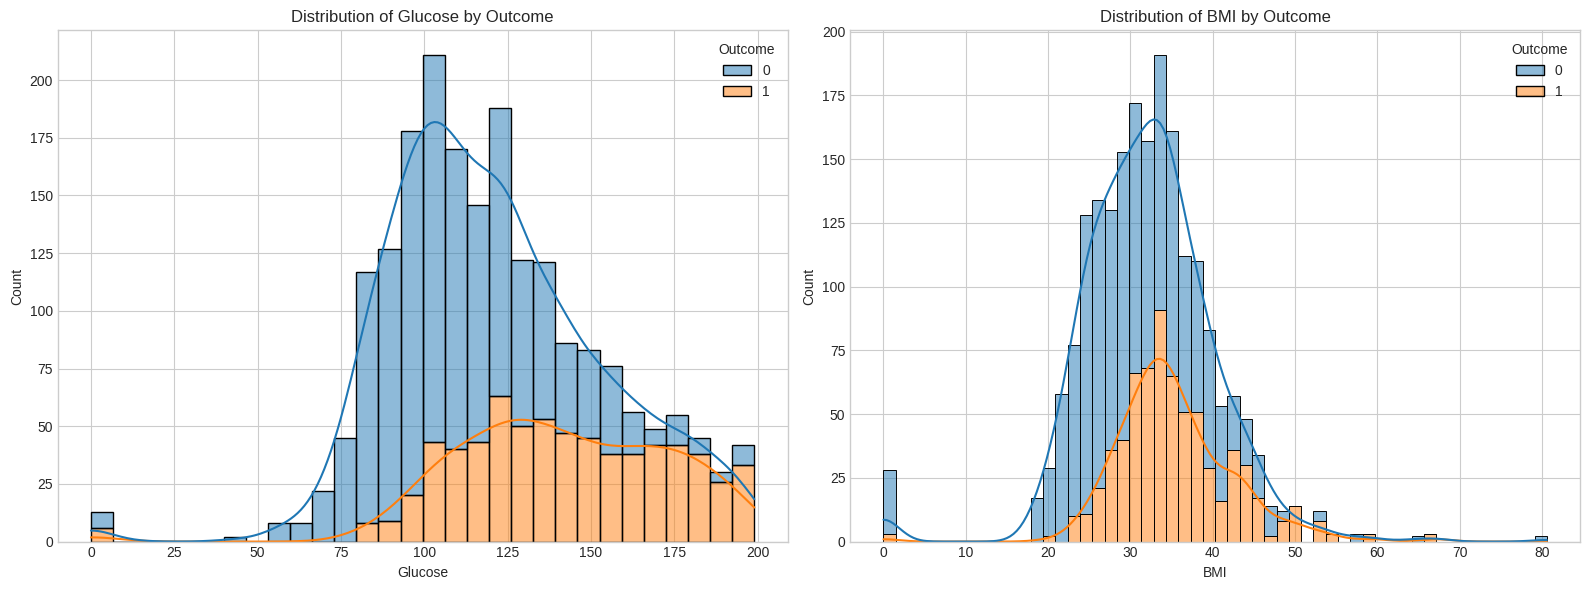

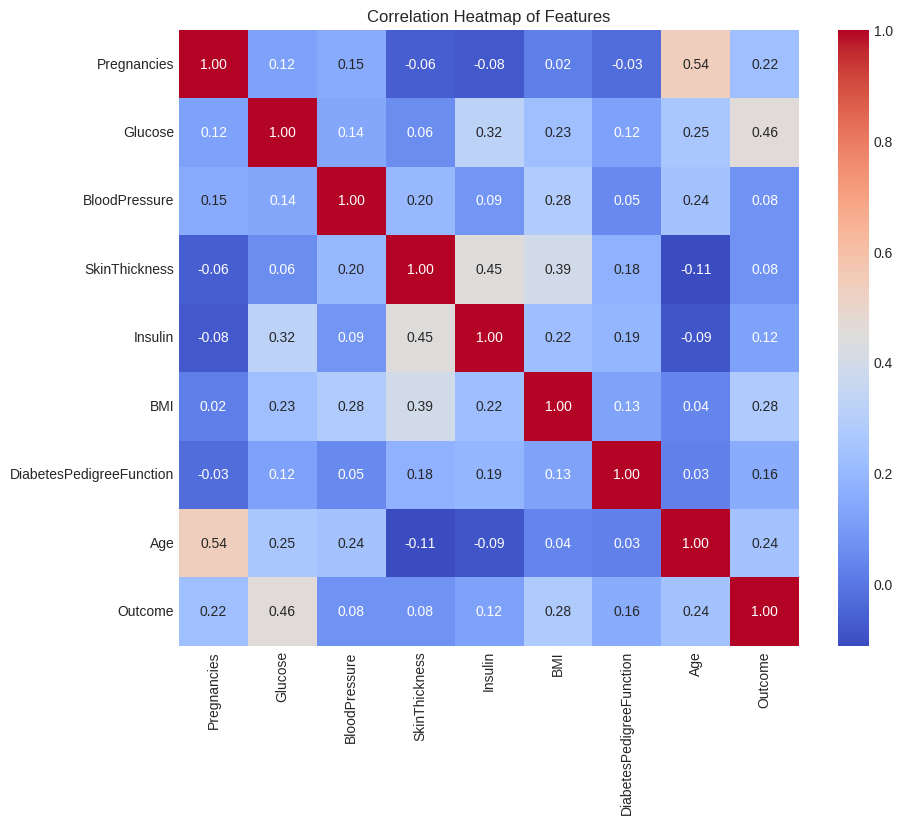

In [3]:
plt.style.use('seaborn-v0_8-whitegrid')

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(data=df, x='Glucose', hue='Outcome', multiple='stack', ax=axes[0], kde=True)
axes[0].set_title('Distribution of Glucose by Outcome')

sns.histplot(data=df, x='BMI', hue='Outcome', multiple='stack', ax=axes[1], kde=True)
axes[1].set_title('Distribution of BMI by Outcome')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

Feature Selection and Datat Splitting

In [5]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape, "\n")

Training set size: (1600, 8)
Testing set size: (400, 8) 



Model Training

In [6]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("Model training completed.\n")

Model training completed.



Model Evaluation

Model Accuracy: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       253
           1       0.99      0.99      0.99       147

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400
 

Confusion Matrix:
[[251   2]
 [  2 145]]


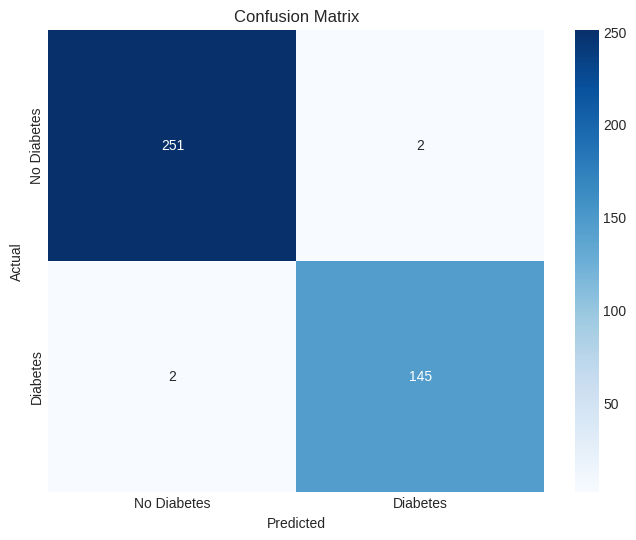

In [7]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred), "\n")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Feature Importance

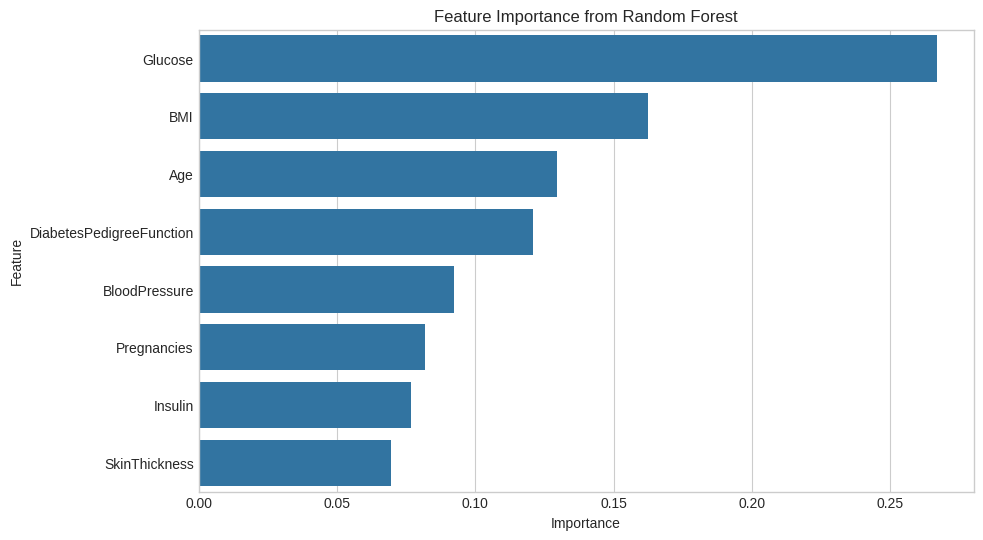

In [8]:
importances = model.feature_importances_
features = X.columns
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('Feature Importance from Random Forest')
plt.show()

Save the Model

In [9]:
import joblib
joblib.dump(model, 'diabetes_model.pkl')
print("Model saved as 'diabetes_model.pkl'")

Model saved as 'diabetes_model.pkl'
